In [ ]:
# pip uninstall -y gensim

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Supervized learning with word2vec
        </h1>
    </div>
</div>

- **[Preprocessing](#pre)**

- **[GridSearch](#gri)**

- **[Resultat](#re)**

- **[Resultat par modeles](#mo)**


Dans ce notebook , nous allons utiliser uniquement wor2vec entrainer sur notre vocabulaire, que nous allons tester dans un gridsearch

In [25]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [ ]:
# pip install  gensim===3.2.1

In [ ]:
# pip uninstall pyLDAvis

In [ ]:
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

In [2]:
# Import Python libraries
import os
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import unicodedata
from bs4 import BeautifulSoup
# from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

from IPython.core.display import display, HTML
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import timeit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, recall_score,precision_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import HistGradientBoostingClassifier, RandomTreesEmbedding, VotingClassifier,StackingClassifier
import joblib

In [3]:
from sklearn.multioutput import ClassifierChain,MultiOutputRegressor,MultiOutputClassifier,RegressorChain
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet,RidgeClassifier
from sklearn.svm import LinearSVC
from scipy.stats import reciprocal, uniform

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [5]:

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# !python -m pip install -U gensim

In [6]:
# import utils own functions
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/media/ismail/Elements/formation/livrable/P5_azdad_ismail/utils.py'>

In [ ]:
# pip install  gensim===4.1.1

In [8]:
data = pd.read_csv("stackoverflow_cleaned.csv",sep=";", index_col=0,
                               converters={
                                   "tags": literal_eval,
                                   "text": literal_eval
                               }
                  )
data.head()

,tags,full_text,text,score
Id,,,,
5767325,"[javascript, arrays]",How can I remove a specific item from an array? I have an array of numbers and I'm using the method to add elements to it.\nIs there a simple way to remove a specific element from an array?\nI'm looking for the equivalent of something like:\n\nI have to use core JavaScript. Frameworks are not allowed.\n,"[item, array, array, number, method, element, way, element, array, equivalent, something, core, javascript, framework]",10385
7244321,[git],"How do I update or sync a forked repository on GitHub? I forked a project, applied several fixes and created a pull request which was accepted. A few days later, another change was made by another contributor. So my fork doesn't contain that change.\nHow can I get that change into my fork? Do I need to delete and re-create my fork when I have further changes to contribute? Or is there an update button?\n","[repository, github, project, fix, pull, request, day, change, contributor, fork, change, change, fork, fork, change, update, button]",4359
8710619,[java],"Why don't Java's +=, -=, *=, /= compound assignment operators require casting? Until today, I thought that for example:\n\nWas just a shortcut for:\n\nBut if we try this:\n\nThen will not compile but will compile fine.\nDoes it mean that in fact is a shortcut for something like this\n?\n","[java, compound, assignment, operator, today, example, shortcut, fact, shortcut, something]",3779
6245570,[git],"How to get the current branch name in Git? I'm from a Subversion background and, when I had a branch, I knew what I was working on with ""These working files point to this branch"".\nBut with Git I'm not sure when I am editing a file in NetBeans or Notepad++, whether it's tied to the master or another branch.\nThere's no problem with in bash, it tells me what I'm doing.\n","[branch, name, git, subversion, background, branch, file, point, branch, git, file, netbeans, master, branch, problem, bash]",3372
8467424,[bash],"Echo newline in Bash prints literal \n In Bash, tried this:\n\nBut it doesn't print a newline, only . How can I make it print the newline?\nI'm using Ubuntu 11.04 (Natty Narwhal).\n","[echo, newline, bash, print, bash, newline, newline, ubuntu, natty, narwhal]",3050


In [15]:
data.loc[data['tags'].str.len()>4,['full_text','tags']].sample(5)

,full_text,tags
Id,,
18783300,"Android converting string to array string I have a string like this:\n\nHow to have a String[] with these 5 element?\nDoes anyone know a regex for method?\nThank you very much, regular expressions make me crazy! :(\n","[java, android, regex, arrays, string]"
30253404,"Jquery preventDefault not working on android 4.4 default browser I am working with a angular and jquery based website. I have a text input field for validating array of floating numbers. My requirement is to restrict the user from entering alphabets, etc. \nThe problem is I am using but its not working in android default browser but working perfectly in android chrome. \nI have searched a lot but unable to get any solution.\nMy sample code :-\n\nI have also tried :-\n\nWorking fiddle\nNote:- I cannot use event as the android default browser cannot listen this event.\n","[javascript, android, jquery, html, angularjs]"
19270073,"Java thread creation performance vs C# thread creation performance vs C++ (native threads)? I'm interesting what are actual costs of threads creation in Java, C# and C++? I know that when thread is creating a bunch of operations must be done: allocate thread stack, initialize descriptors, etc.\nBut I'm interesting in actual costs. C# and Java use different VM's and different JITs and C++ executes native code. So thread creation time is different in all of these languages. I also heard that thread creation in Java is much slower that in C#. Can someone give authorative answers and explanations on this issue?\n","[c#, java, c++, multithreading, performance]"
32796176,"Prevent user from copying text on mobile browsers I'm trying to develop a typing speed competition using JavaScript. People should write all the words they see from a div to a textarea.\nTo prevent cheating (like copying the words from div) one way is check the written words only when a keyboard key is down, but I was wondering if there is a way to prevent the user from copying the text in a browser?\nWhat I have tried so far:\n\nDisable right click (didn't work on mobile browsers)\nShow an alert using the onmousedown event in all the page (it didn't work either)\n\nUsing any libraries is OK.\n","[javascript, php, jquery, html, css]"
27505245,"Basic AngularJs not able to route to different page Not new to programming. But I'm new to angularjs. So it's probably a daft question..\nI've been following a tutorial...but for some reason the page routing doesn't work.\nI have a nav bar on the top, home, about, contact etc. Typical stuff.\nI would like to be able to click on ""about"" and be routed to the about.html file on the same page.\nNothing appears! The index.html is in a partials file. Please note I'm a newbie to angular and I've followed the instructions. My server works fine. The Nav bar looks good but doesn't link properly.\nThis is the code for index.html. Thanks\n\n\n\n\n\nand this is the code for script.js\n\n","[javascript, jquery, html, css, angularjs]"


<a name='pre'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preprocessing 
        </h1>
    </div>
</div>

In [9]:
X = data["text"]
y = data['tags']
multilabel_binarizer = MultiLabelBinarizer()
y_encoded = multilabel_binarizer.fit_transform(y)

X_train, X_test, y_train , y_test = train_test_split(X , y_encoded, test_size = 0.2, random_state= 0)

In [22]:
import multiprocessing
from gensim.models import Word2Vec

model = Word2Vec(
                X_train, 
                vector_size=200, 
                window=20,
                min_count=5, 
                sample=6e-5, 
                alpha=0.03, 
                min_alpha=0.0007, 
                negative=20,                          
                workers=7)


model.corpus_count

74960

In [9]:
model.epochs

5

In [23]:
model.build_vocab(X_train)
model.train(X_train, total_examples=model.corpus_count, epochs=model.epochs, report_delay=1)

(4374597, 11387685)

In [11]:
model.wv.most_similar(positive=["linux"])

[('glibc', 0.5764330625534058),
 ('ubuntu', 0.5751938819885254),
 ('mint', 0.5377512574195862),
 ('distro', 0.5342617034912109),
 ('cygwin', 0.5285261869430542),
 ('nix', 0.5266562104225159),
 ('lts', 0.5227938294410706),
 ('gnu', 0.5177749991416931),
 ('mojave', 0.5145655870437622),
 ('unix', 0.5123425722122192)]

In [12]:
model.wv.most_similar(positive=["java"])

[('ee', 0.5601323843002319),
 ('jvms', 0.5522980690002441),
 ('javadocs', 0.5483051538467407),
 ('jre', 0.5473219752311707),
 ('javac', 0.5325884222984314),
 ('se', 0.5283655524253845),
 ('jdk', 0.5280005931854248),
 ('jvm', 0.5180177688598633),
 ('eeee', 0.5165523290634155),
 ('openjdk', 0.4865986108779907)]

In [27]:
model.save('/content/ShardDrives/MyDrive/nlp/w2v/stackOverflow_word2vec.bin')

### Pour chaque phrase, on fait la somme des vecteurs associés aux mots qui la composent ou pas si le mot n’est pas dans le vocabulaire, pour generer nos features

In [28]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

X_train = word2vec_features(X_train, model)
X_train.shape

(74960, 200)

In [29]:
X_test = word2vec_features(X_test, model)
X_test.shape

(18741, 200)

test

In [ ]:
logisticWv =  Pipeline([
    #with word to vector (vec size 300)
    ('std',StandardScaler()),
    ('test',OneVsRestClassifier(LogisticRegression(max_iter=1000))), 
])
logisticWv.fit(X_train[0:30000], y_train[0:30000])
# logisticWv.fit(X_train, y_train)
getMetrics(logisticWv,'logisticWv',X_test, y_test)

,estimator,accuracy,f1_macro,f1_micro,jaccard,recall,precision
0,logisticWv,0.35446,0.518,0.62,0.454,0.51,0.763


In [16]:
multilabel_binarizer.classes_

array(['.net', 'algorithm', 'android', 'angular', 'angularjs', 'arrays',
       'asp.net', 'bash', 'c', 'c#', 'c++', 'c++11', 'css', 'gcc', 'git',
       'google-chrome', 'haskell', 'html', 'ios', 'iphone', 'java',
       'java-8', 'javascript', 'jquery', 'json', 'language-lawyer',
       'linux', 'macos', 'multithreading', 'mysql', 'node.js',
       'objective-c', 'performance', 'php', 'pointers', 'python',
       'python-3.x', 'r', 'reactjs', 'regex', 'ruby', 'ruby-on-rails',
       'sql', 'sql-server', 'string', 'swift', 'typescript',
       'visual-studio', 'windows', 'xcode'], dtype=object)

In [30]:
X.shape , y.shape

((93701,), (93701,))

<a name='gri'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          gridsearch
        </h1>
    </div>
</div>


Grisearch sur nos modeles, afin d optimer nos hyperparametres

In [55]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import RidgeCV
from sklearn import linear_model

class nlpEstimatorAlgo:

    
    def __init__(self, models, params,useLog=True):
        self.models = models
        self.keys = models.keys()
        self.params = params
        self.grid_searches = {}
        self.useLog = useLog
        self.bestParams = {}
        self.scorer = {}
        self.cv_results = {}
        self.scoring = {
                        "accuracy" : "accuracy",
                        "f1" : "f1", 
                        "jaccard" : "jaccard",
                        "recall" : "recall",
                        "precision":"precision"
                        }
#         self.kfold = KFold(n_splits=5, random_state=0) 
        self.kfold = KFold(n_splits=5) 
#         self.kfold = StratifiedKFold(n_splits=5)
       
    
    def fit(self, X_train, y_train):
        print('shape training set {}'.format(X_train.shape))
        starttotaltime = timeit.default_timer()
        for model_name in self.keys:
            print('Running GridSearchCV for %s.' % model_name)     
            starttime = timeit.default_timer()
            model = self.models[model_name]
            params = self.params[model_name]
            print('training model',model)  
            #GridSearchCV
            #RandomizedSearchCV
            pipeline =  Pipeline([
                ('std',StandardScaler()),
                (model_name,OneVsRestClassifier(model)), 
            ])
            
            grid_search = GridSearchCV(
                                    pipeline, 
                                    params,  
                                    # n_iter = 5,                                  
                                    # scoring = self.scoring,
                                    # scoring = "f1_weighted",
                                    scoring = {
                                                "f1_weighted" : "f1_weighted", 
                                                "accuracy" : "accuracy",
                                                },
                                    return_train_score = True,
                                    # refit=True,
                                    refit="f1_weighted",
                                    cv = self.kfold,
                                    n_jobs=-1,
                                    
                                    )


#             print(grid_search.get_params().keys())
            grid_search.fit(X_train, y_train)
            self.bestParams[model_name] = grid_search.best_params_
            self.scorer[model_name] = grid_search.best_estimator_
            self.grid_searches[model_name] = grid_search
            self.cv_results[model_name] = grid_search.cv_results_
            
            
            elapsed = timeit.default_timer() - starttime
            print('training {} model done'.format(model_name))
            print("elapsed time {:.2f}s".format(elapsed))
        print('All training done.')
        elapsed = timeit.default_timer() - starttotaltime
        print("total time {:.2f}s".format(elapsed))
        
        
    def getBestParams(self):
        return self.bestParams
    
    def showBestParams(self,useindex=False):
        frames =[]
        result = pd.DataFrame()
        for name, bestParams in self.bestParams.items():      
            frame = pd.DataFrame()
            frame['estimator'] = [name]  
            frame['best_params'] = [bestParams]
            frames.append(frame)
        result = pd.concat(frames) 
        result = result.reset_index()
        if(useindex):
            result.set_index('estimator', inplace=True)
        result = result.drop([ 'index'], 1)
        return result     
    
    def getGetScorer(self):
        return self.scorer 
    
    def getCvResults(self):
        return sel.cv_results_
    
    def getPredictionsResult(self, name, X_test):
      # Predict
      result = pd.DataFrame()
      y_test_predicted_labels = self.grid_searches[name].predict(X_test)
      result['True_Tag'] = multilabel_binarizer.inverse_transform(y_test)
      result['predicted_Tag'] = multilabel_binarizer.inverse_transform(y_test_predicted_labels)
      return result

    def getUnTaggedPredictionsByModel(self, X_test):
      frames =[]
      result = pd.DataFrame()
      for name, grid_search in self.grid_searches.items():  
        frame = pd.DataFrame()
        y_test_predicted_labels = grid_search.predict(X_test)
        tags_per_row = y_test_predicted_labels.sum(axis=1)
        null_rate = round(((tags_per_row.size - np.count_nonzero(tags_per_row))/tags_per_row.size)*100,2)
        frame['estimator'] = [name]  
        frame['untaged'] = str(null_rate) +'%'
        frames.append(frame)
      result = pd.concat(frames)   
      return result
    
    def getClassificationReport(self,name, y_test, X_test):                
        y_test_predicted_labels = self.grid_searches[name].predict(X_test)                
        print('accuracy model {} : {}'.format(name, accuracy_score(y_test_predicted_labels, y_test)))                
        report_dict = classification_report(y_test, y_test_predicted_labels, output_dict=True, target_names=multilabel_binarizer.classes_)
        return pd.DataFrame(report_dict).T

    def savemodels(self):
      joblib.dump(multilabel_binarizer,'/content/ShardDrives/MyDrive/nlp/tfidf/w2v_multilabel_binarizer.pkl')

      for name, grid_search in self.grid_searches.items():  
        joblib.dump(grid_search,'/content/ShardDrives/MyDrive/nlp/w2v/'+name+'-w2v.pkl')

     #renvoie les meilleurs resulats par modele contenu tester sur les variables test
    def getBestModeleScore_scorePrediction(self, useIndex=True):
        frames =[]
        result = pd.DataFrame()
        for name, grid_search in self.grid_searches.items():      
            frame = pd.DataFrame()
            #grid_search.predict(X_test) is equivalent to grid_search.best_estimator_.predict(X_test)
            # Inverse transform
            y_pred = grid_search.predict(X_test) 
            frame['estimator'] = [name]  
            frame['accuracy'] = np.round((accuracy_score(y_test, y_pred)), 5)
            frame['f1_macro'] = np.round(f1_score(y_test, y_pred, average="macro"), 3)
            frame['f1_micro'] = np.round(f1_score(y_test, y_pred, average="micro"), 3)
            frame['jaccard'] = np.round(jaccard_score(y_test, y_pred, average="weighted"), 3)
            frame['recall'] = np.round(recall_score(y_test, y_pred, average="weighted"), 3)
            frame['precision'] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)                            
            frames.append(frame)
        result = pd.concat(frames) 
        result = result.reset_index()
        if(useIndex is True):
          result.set_index('estimator', inplace=True)
        result = result.drop([ 'index'], 1)
        return result  
    
    #affiche les meilleurs resulats par modele contenu tester sur les variables test
    def getBestModeleScore_graphpredictions(self,X_test):          
        plt.rcParams['font.size'] = '10'
        ax = self.getBestModeleScore_scorePrediction(True).plot(kind='bar',figsize=(15,6)) 
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

        plt.legend(loc=2)
        plt.title('Resultats des meilleurs predictions par modeles apres hyperparametrisations')
        plt.show()      
    
#     Generate 3 plots: the test and training learning curve, the training
#     samples vs fit times curve, the fit times vs score curve.
    def getLearningCurveByName(self,model_name,X_train,y_train):
        ## Results from grid search
        grid = self.grid_searches[model_name]
        title = "learning curve for model {}".format(model_name)
        estimator = grid.best_estimator_
        estimator = grid.best_estimator_
        utils.plot_learning_curve(
            estimator, title, X_train, y_train,ylim=None, cv=self.kfold, n_jobs=4
        )        
        plt.show()    
        
    #Show validation between real values vs predicted values        
    def showPredictionbyName(self,name,target,X_train,y_train):
        plot_cross_val_predi(self.grid_searches[name].best_estimator_, name, target, X_train, y_train, cv=self.kfold)          

    
models = {   
        'SGDClassifier':SGDClassifier(),
        'logistic': LogisticRegression(),
        'randomForest': RandomForestClassifier(),
        'RidgeClassifier' : RidgeClassifier(),

}

params_models = {

            'SGDClassifier':{
                'SGDClassifier__estimator__max_iter': [1000], # number of epochs
                'SGDClassifier__estimator__loss': ['log'], # logistic regression,
                'SGDClassifier__estimator__penalty': ['l1','l2'],
                'SGDClassifier__estimator__n_jobs': [-1]
                },

            'logistic': 
                            {
                              "logistic__estimator__C": [10, 1.0, 0.1],
                              "logistic__estimator__penalty": ["none", "l2"],
                              "logistic__estimator__dual": [False],
                            },
            'randomForest' :{
                              "randomForest__estimator__max_depth": [5, 25, 50],
                              "randomForest__estimator__min_samples_leaf": [1, 5, 10],
                              "randomForest__estimator__class_weight": ["balanced"]
                             },  
    
            'RidgeClassifier': {                
                        'RidgeClassifier__estimator__max_iter': [1500,2000,3000],
                        'RidgeClassifier__estimator__alpha': np.arange(0.1, 1, .2).tolist(),        
                        'RidgeClassifier__estimator__solver' :['auto', 'cholesky']
                    },   

        
               
}     

algo_estimator = nlpEstimatorAlgo(models, params_models,True)
algo_estimator.fit(X_train[0:30000],y_train[0:30000])

shape training set (30000, 200)
Running GridSearchCV for SGDClassifier.
training model SGDClassifier()
training SGDClassifier model done
elapsed time 1012.87s
Running GridSearchCV for logistic.
training model LogisticRegression()
training logistic model done
elapsed time 171.78s
Running GridSearchCV for randomForest.
training model RandomForestClassifier()
training randomForest model done
elapsed time 3356.41s
Running GridSearchCV for RidgeClassifier.
training model RidgeClassifier()
training RidgeClassifier model done
elapsed time 95.90s
All training done.
total time 4636.97s


<a name='re'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          resultat
        </h1>
    </div>
</div>

In [56]:
algo_estimator.getBestModeleScore_scorePrediction(X_test)

,estimator,accuracy,f1_macro,f1_micro,jaccard,recall,precision
0,SGDClassifier,0.32010,0.522,0.608,0.451,0.560,0.662
1,logistic,0.35473,0.522,0.619,0.454,0.510,0.761
2,randomForest,0.32442,0.557,0.627,0.462,0.591,0.683
3,RidgeClassifier,0.15367,0.183,0.337,0.202,0.211,0.759


In [57]:
algo_estimator.savemodels()

In [58]:
algo_estimator.getBestModeleScore_scorePrediction().to_csv("/content/ShardDrives/MyDrive/nlp/w2v/w2v_models_resutls.csv")

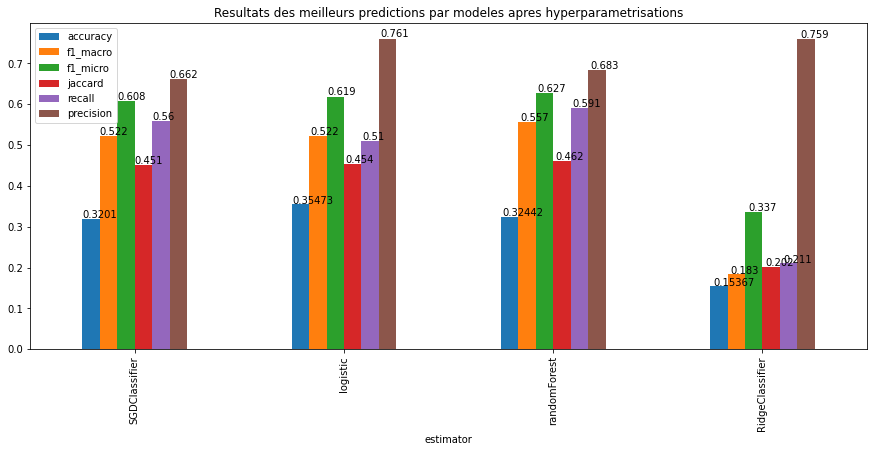

In [59]:
algo_estimator.getBestModeleScore_graphpredictions(X_test)

In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [61]:
algo_estimator.showBestParams()

,estimator,best_params
0,SGDClassifier,"{'SGDClassifier__estimator__loss': 'log', 'SGDClassifier__estimator__max_iter': 1000, 'SGDClassifier__estimator__n_jobs': -1, 'SGDClassifier__estimator__penalty': 'l1'}"
1,logistic,"{'logistic__estimator__C': 10, 'logistic__estimator__dual': False, 'logistic__estimator__penalty': 'l2'}"
2,randomForest,"{'randomForest__estimator__class_weight': 'balanced', 'randomForest__estimator__max_depth': 50, 'randomForest__estimator__min_samples_leaf': 10}"
3,RidgeClassifier,"{'RidgeClassifier__estimator__alpha': 0.1, 'RidgeClassifier__estimator__max_iter': 1500, 'RidgeClassifier__estimator__solver': 'auto'}"


In [62]:
algo_estimator.getUnTaggedPredictionsByModel(X_test)

,estimator,untaged
0,SGDClassifier,20.71%
0,logistic,29.13%
0,randomForest,21.96%
0,RidgeClassifier,68.42%


<a name='mo'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat par modeles
        </h1>
    </div>
</div>

Dans cette partie nous allons analyser plus en detail chaque modele.

- La prediction de tag realiser par le modele vs tag reel
    
- la learning curve du modele (si il y a Under/Over fitting)
    
-  ainsi que la classification report par tag
    

,True_Tag,predicted_Tag
6095,"(.net, c#)",()
15682,"(android,)","(android,)"
13328,"(haskell, linux)","(c, haskell, linux)"
5884,"(c,)","(c,)"
3250,"(iphone,)",()
16632,"(visual-studio,)","(c#,)"
9513,"(c#,)","(c#,)"
11707,"(c++,)","(c++,)"
4266,"(c++, java)","(c++, java)"
17405,"(node.js,)",()


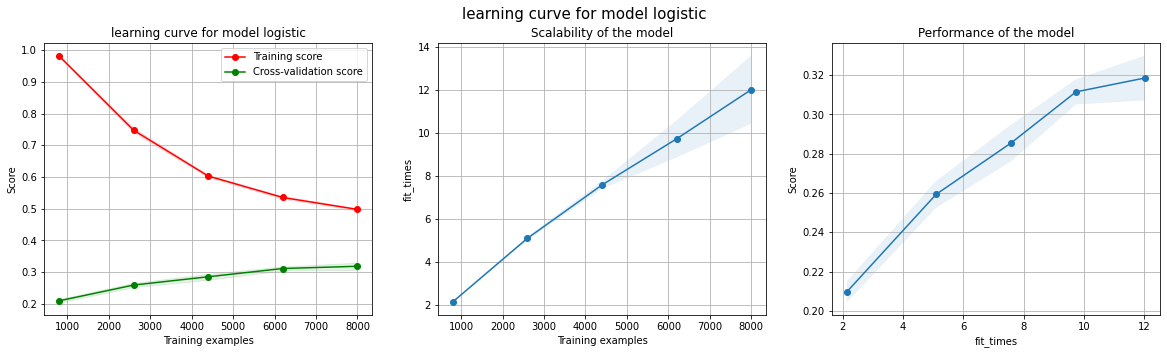

accuracy model logistic : 0.35473027052985434


,precision,recall,f1-score,support
.net,0.500000,0.123103,0.197564,593.0
algorithm,0.757500,0.564246,0.646745,537.0
android,0.926325,0.755311,0.832123,1365.0
angular,0.721805,0.388664,0.505263,247.0
angularjs,0.800000,0.409756,0.541935,205.0
arrays,0.633745,0.351598,0.452276,438.0
asp.net,0.493506,0.179245,0.262976,212.0
bash,0.706422,0.445087,0.546099,173.0
c,0.753906,0.474201,0.582202,1221.0
c#,0.808449,0.518207,0.631579,2142.0


In [63]:
display(algo_estimator.getPredictionsResult( "logistic", X_test).sample(10))
algo_estimator.getLearningCurveByName('logistic',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("logistic",y_test,X_test)

,True_Tag,predicted_Tag
7192,"(java,)",()
4929,"(javascript, jquery, ruby-on-rails)","(javascript, jquery, ruby-on-rails)"
18703,"(performance,)","(.net, c#)"
3412,"(python,)","(python,)"
13988,"(algorithm,)","(algorithm,)"
6126,"(java,)","(java,)"
4388,"(c,)","(c, gcc, language-lawyer, pointers)"
4515,"(c++,)",()
11790,"(c++, string)",()
15497,"(ios, swift)",()


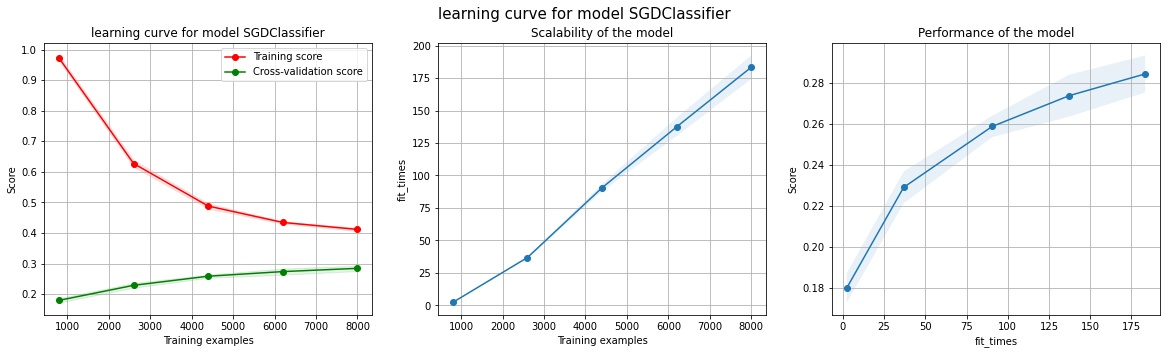

accuracy model SGDClassifier : 0.3201003148177792


,precision,recall,f1-score,support
.net,0.319475,0.246206,0.278095,593.0
algorithm,0.659708,0.588454,0.622047,537.0
android,0.846709,0.772894,0.808119,1365.0
angular,0.489796,0.485830,0.487805,247.0
angularjs,0.564626,0.404878,0.471591,205.0
arrays,0.474874,0.431507,0.452153,438.0
asp.net,0.319527,0.254717,0.283465,212.0
bash,0.585185,0.456647,0.512987,173.0
c,0.646083,0.574120,0.607979,1221.0
c#,0.755937,0.535014,0.626572,2142.0


In [65]:
display(algo_estimator.getPredictionsResult("SGDClassifier", X_test).sample(10))
algo_estimator.getLearningCurveByName('SGDClassifier',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("SGDClassifier",y_test,X_test)

,True_Tag,predicted_Tag
0,"(php,)","(php,)"
1,"(android,)",()
2,"(c++,)","(c, c++)"
3,"(html,)",()
4,"(css, javascript)","(css, html, javascript, jquery)"
5,"(ios, xcode)","(ios, xcode)"
6,"(javascript, regex)","(css, html, javascript)"
7,"(ios, swift)","(ios, objective-c, swift, xcode)"
8,"(android, multithreading)","(android, multithreading)"
9,"(angularjs,)","(html,)"


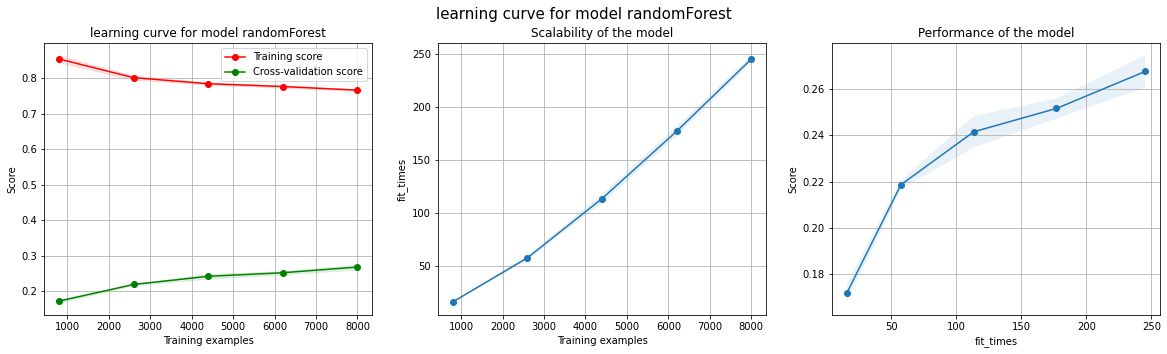

accuracy model randomForest : 0.3244223894135852


,precision,recall,f1-score,support
.net,0.625483,0.273187,0.380282,593.0
algorithm,0.671848,0.724395,0.697133,537.0
android,0.857877,0.734066,0.791157,1365.0
angular,0.689189,0.412955,0.516456,247.0
angularjs,0.827586,0.351220,0.493151,205.0
arrays,0.592342,0.600457,0.596372,438.0
asp.net,0.528000,0.311321,0.391691,212.0
bash,0.603448,0.404624,0.484429,173.0
c,0.601817,0.651106,0.625492,1221.0
c#,0.724434,0.552288,0.626755,2142.0


In [69]:
display(algo_estimator.getPredictionsResult("randomForest",X_test).head(10))
algo_estimator.getLearningCurveByName('randomForest',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("randomForest",y_test,X_test)

,True_Tag,predicted_Tag
13472,"(android,)",()
906,"(c++,)",()
8417,"(swift,)",()
13259,"(git,)",()
9268,"(c++,)","(c++,)"
8915,"(c++,)",()
1753,"(c++,)",()
15523,"(javascript,)",()
14464,"(c, c#)",()
17355,"(java,)","(java,)"


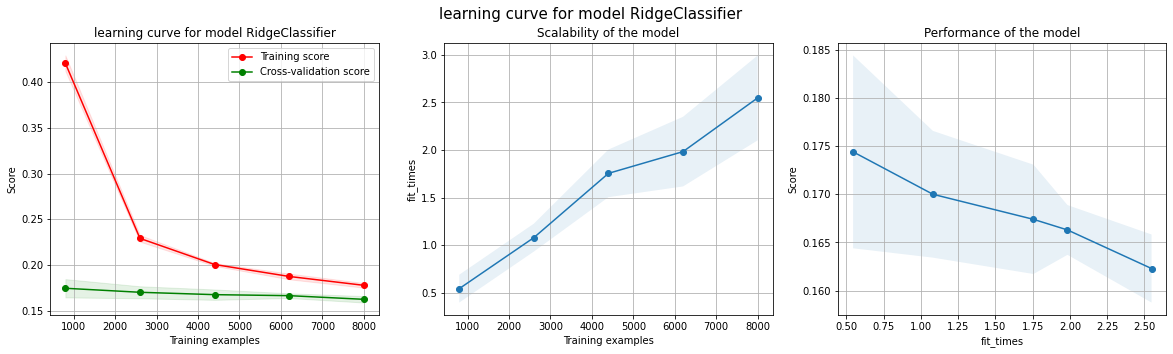

accuracy model RidgeClassifier : 0.1536737634064351


,precision,recall,f1-score,support
.net,0.636364,0.023609,0.045528,593.0
algorithm,0.801047,0.284916,0.420330,537.0
android,0.955556,0.409524,0.573333,1365.0
angular,0.500000,0.020243,0.038911,247.0
angularjs,0.888889,0.039024,0.074766,205.0
arrays,0.560000,0.095890,0.163743,438.0
asp.net,0.428571,0.014151,0.027397,212.0
bash,0.666667,0.011561,0.022727,173.0
c,0.746835,0.144963,0.242798,1221.0
c#,0.802963,0.253035,0.384807,2142.0


In [66]:
display(algo_estimator.getPredictionsResult("RidgeClassifier", X_test).sample(10))
algo_estimator.getLearningCurveByName('RidgeClassifier',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("RidgeClassifier",y_test,X_test)

Conclusion : Word2vec a legerement ameliorer nos modeles par rapport a tf idf

<div class="bg-primary text-lg-left text-white">
    <div>
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          API disponlible
        </h1>
    </div>

</div>
    <div class="text-lg-left ">
       <a href="https://github.com/ismailazdad/stackoverflowTags" target="_blank">stackoverflow</a>
    </div>
     <div>       
       <a href="http://ismail2233.pythonanywhere.com/" target="_blank">online version</a>
    </div>



In [67]:
from sklearn.metrics import multilabel_confusion_matrix
y_test_predicted_labels = algo_estimator.grid_searches['logistic'].predict(X_test)   
print(multilabel_confusion_matrix(y_test, y_test_predicted_labels))

[[[18075    73]
  [  520    73]]

 [[18107    97]
  [  234   303]]

 [[17294    82]
  [  334  1031]]

 [[18457    37]
  [  151    96]]

 [[18515    21]
  [  121    84]]

 [[18214    89]
  [  284   154]]

 [[18490    39]
  [  174    38]]

 [[18536    32]
  [   96    77]]

 [[17331   189]
  [  642   579]]

 [[16336   263]
  [ 1032  1110]]

 [[15869   285]
  [  872  1715]]

 [[18159    98]
  [  403    81]]

 [[17878   106]
  [  214   543]]

 [[18481    59]
  [   99   102]]

 [[18421    21]
  [   37   262]]

 [[18517    43]
  [   96    85]]

 [[18554    20]
  [   49   118]]

 [[17640   184]
  [  578   339]]

 [[17716   145]
  [  379   501]]

 [[18525    50]
  [  128    38]]

 [[16340   180]
  [  914  1307]]

 [[18543    34]
  [  119    45]]

 [[16112   353]
  [ 1102  1174]]

 [[17975    84]
  [  358   324]]

 [[18450    37]
  [  108   146]]

 [[18474    45]
  [  162    60]]

 [[18403    47]
  [  233    58]]

 [[18553    32]
  [   97    59]]

 [[18435    49]
  [  149   108]]

 [[18314    61

Word2vec